# Le VIH en Afrique du Sud

# Introduction

- **Contexte de l'épidémie :**
   - L'Afrique du Sud est le pays avec la plus grande population de personnes vivant avec le HIV, soit environ **7,8 millions** en 2022.
   - Bien que des progrès aient été réalisés grâce aux programmes de traitement antirétroviral (ARV), des défis majeurs persistent (inégalité d'accès, stigmatisation).

- **Vulnérabilité des jeunes femmes :**
   - Les jeunes femmes sont les plus touchées, avec environ **25 % des femmes âgées de 15 à 24 ans** infectées.
   - Les causes incluent l'inégalité des genres, la violence sexuelle et un accès limité à l'éducation et aux soins.

- **Progrès dans la transmission mère-enfant :**
   - La transmission du HIV de la mère à l’enfant a été réduite à **moins de 2 %** grâce à des programmes de prévention efficaces.

- **Objectif du projet :**
   - Modéliser l’impact du traitement et de la sensibilisation sur l'épidémie.




## 1. Importation des données

In [1]:
import pandas as pd
import numpy as np

### 1.1 Données d'inféctions

In [2]:
df=pd.read_csv('data_hiv.csv')

In [3]:
df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,HIV_0000000026,Number of new HIV infections,numeric,AMR,Americas,Country,BRB,Barbados,Year,2023,...,NaN,NaN,100.0,NaN,100.0,<100 [<100 - <100],NaN,NaN,EN,2024-07-21T23:00:00.000Z
1,HIV_0000000026,Number of new HIV infections,numeric,AFR,Africa,Country,COM,Comoros,Year,2023,...,NaN,NaN,100.0,NaN,100.0,<100 [<100 - <100],NaN,NaN,EN,2024-07-21T23:00:00.000Z
2,HIV_0000000026,Number of new HIV infections,numeric,EUR,Europe,Country,HRV,Croatia,Year,2023,...,NaN,NaN,100.0,NaN,100.0,<100 [<100 - <100],NaN,NaN,EN,2024-07-21T23:00:00.000Z
3,HIV_0000000026,Number of new HIV infections,numeric,EUR,Europe,Country,DNK,Denmark,Year,2023,...,NaN,NaN,100.0,NaN,100.0,<100 [<100 - <100],NaN,NaN,EN,2024-07-21T23:00:00.000Z
4,HIV_0000000026,Number of new HIV infections,numeric,EUR,Europe,Country,ISL,Iceland,Year,2023,...,NaN,NaN,100.0,NaN,100.0,<100 [<100 - <100],NaN,NaN,EN,2024-07-21T23:00:00.000Z


In [4]:
new_data=df[df['Location']=='South Africa']

In [5]:
new_data=new_data[['Location','Period','FactValueNumeric','FactValueNumericLow','FactValueNumericHigh']]

In [6]:
new_data.to_csv('southafrica_hiv.csv')

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Nombre de cas de HIV en Afrique du Sud de 2000 à 2023')

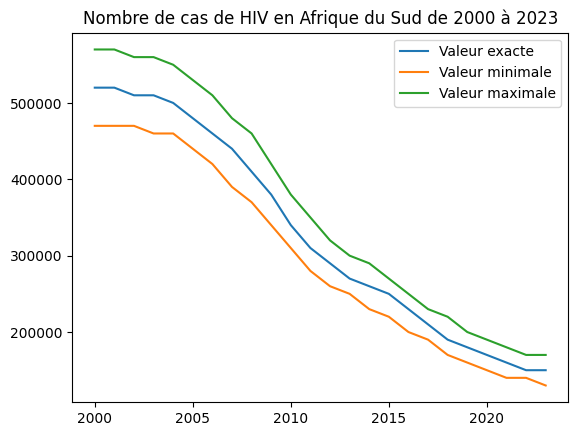

In [8]:
plt.plot(new_data['Period'],new_data['FactValueNumeric'])
plt.plot(new_data['Period'],new_data['FactValueNumericLow'])
plt.plot(new_data['Period'],new_data['FactValueNumericHigh'])
plt.legend(['Valeur exacte','Valeur minimale','Valeur maximale'])
plt.title('Nombre de cas de HIV en Afrique du Sud de 2000 à 2023')

### 1.2 Données de traitement ARV

In [9]:
arv=pd.read_csv('data_ARV.csv')


In [10]:
arv=arv[['Period','FactValueNumeric']]

In [11]:
arv

,Period,FactValueNumeric
0,2023,5936502
1,2022,5792683
2,2021,5649819
3,2020,5501515
4,2015,3682691
5,2010,1407392
6,2005,166179
7,2000,6228


In [12]:
new_rows = {'Period': [2019,2018,2017,2016,2014,2013,2012,2011,2009,2008,2007,2006,2004,2003,2002,2001], 'FactValueNumeric': [5501515]}

In [13]:

data = {
    'Year': [2023, 2022, 2021, 2020, 2015, 2010, 2005, 2000],
    'Value': [5936502, 5792683, 5649819, 5501515, 3682691, 1407392, 166179, 6228]
}
df = pd.DataFrame(data)

# Sort the DataFrame by the 'Year' column in ascending order
df = df.sort_values('Year').reset_index(drop=True)

# Create a new DataFrame that includes all years between the minimum and maximum years
full_years = pd.DataFrame({'Year': range(df['Year'].min(), df['Year'].max() + 1)})

# Merge the full range of years with the original data
df_full = pd.merge(full_years, df, on='Year', how='left')

# Fill the missing values using linear interpolation
df_full['Value'] = df_full['Value'].interpolate()


In [14]:
df_full['Value']=[int(df_full['Value'][i]) for i in range(len(df_full['Value']))]
df_full.head()

,Year,Value
0,2000,6228
1,2001,38218
2,2002,70208
3,2003,102198
4,2004,134188


In [15]:
type(df_full['Value'][0])

numpy.int64

Text(0.5, 1.0, "Nombre d'individus sous traitement ARV de 2000 à 2023")

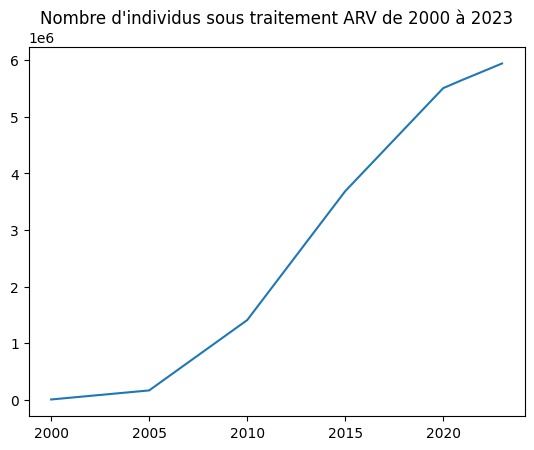

In [16]:
plt.plot(df_full['Year'],df_full['Value'])
plt.title('Nombre d\'individus sous traitement ARV de 2000 à 2023')

In [17]:
infection_data=np.array(new_data['FactValueNumeric'])
infection_data=infection_data[::-1]

## 2. Le modèle

### 2.1 L'approche analytique

#### 2.1.1 Modèle d'origine

Selon Huo, Chen, and Wang (2016), les variables utilisées dans le système sont :      
- $S$ : la population susceptible
- $I$ : la population inféctée
- $A$ : la population infectée de son état infectieux n'étant pas sous traitement ARV
- $T$ : la population sous traitement ARV
- $R$ : la population immunisée grâce au changement de ses habitudes sexuelles

Les équations du modèle s'écrivent :    
$$
\frac{dS}{dt}=\sigma - \beta S I- \mu S -d S  \\
\frac{dI}{dt}=\beta S I + \alpha_1 T- (d+k_1+k_2)I \\
\frac{dA}{dt}=k_1 I + \alpha_2 T- (\delta_1 + d)A \\
\frac{dT}{dt}=k_2 I - \alpha_1 T - \alpha_2 T- (\delta_2 + d)T\\
\frac{dR}{dt}=\mu S -d R
$$

avec :
- $\sigma$ : population initiale
- $\alpha_1$ : taux de réussite du traitement
- $\alpha_2$ : taux d'échec du traitement
- $\beta$ : taux d'infection
- $\delta_1$ : taux de mortalité du HIV sans traitement
- $\delta_2$ : taux de mortalité du HIV suite au traitement
- $\mu$ : taux de prise de conscience et changement d'habitudes sexuelles
- $k_1$ : taux de passage à un stade avancé du HIV
- $k_2$ : taux d'accès au traitement
- $d$ : taux de mortalité naturelle


Soit $x = (I, A, T, S, R)^T$, alors le système peut s'écrire comme :

$$
\frac{dx}{dt} = \mathcal{F}(x) - \mathcal{V}(x),
$$

où,

$$
\mathcal{F}(x) =
\begin{pmatrix}
\beta I S \\
0 \\
0 \\
0 \\
0
\end{pmatrix}
,
\quad
\mathcal{V}(x) =
\begin{pmatrix}
(k_1 + k_2 + d) I - \alpha_1 T \\
(\delta_1 + d) A - k_1 I - \alpha_2 T \\
(d + \delta_2 + \alpha_1 + \alpha_2) T - k_2 I \\
\beta I S + \mu S + d S - \Lambda \\
d R - \mu S
\end{pmatrix}
.
$$

Les matrices Jacobiennes de $\mathcal{F}(x)$ et $\mathcal{V}(x)$ à l'équilibre sans maladie $E_0$ sont, respectivement,

$$
D\mathcal{F}(E_0) =
\begin{pmatrix}
F& 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}
,
\quad
D\mathcal{V}(E_0) =
\begin{pmatrix}
V & 0 & 0 \\
\frac{\sigma}{\mu + d} & 0 & \mu + d & 0 \\
0 & 0 & -\mu & d
\end{pmatrix}
.
$$

où

$$
F =
\begin{pmatrix}
\beta \frac{\sigma}{\mu + d}  & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix}
\quad \text{et}
\quad
V =
\begin{pmatrix}
d + k_1 + k_2 & 0 & 0 \\
-k_1 & \delta_1 + d & 0 \\
-k_2 & 0 & \delta_2 + d
\end{pmatrix}
$$
#### 2.1.2 Modèle adapté

Les variables utilisées dans notre système sont :      
- $S$ : la population susceptible
- $I$ : la population infectée
- $A$ : la population infectée de son état infectieux n'étant pas sous traitement ARV
- $C$ : la population consciente de son état infectieux
- $T$ : la population sous traitement ARV
- $R$ : la population immunisée grâce au changement de ses habitudes sexuelles

Les nouvelles équations du modèle s'écrivent :    
$$
\frac{dS}{dt}=\sigma - \beta S I- \mu S -d S  \\
\frac{dI}{dt}=\beta S tT + \alpha_1 T- (d+k_1+k_2)I \\
\frac{dA}{dt}=k_1 I + \alpha_2 T- (\delta_1 + d)A \\
\frac{dC}{dt}=k_2 I + \lambda C- d C \\
\frac{dT}{dt}=\lambda C - \alpha_1 T - \alpha_2 T- (\delta_2 + d)T\\
\frac{dR}{dt}=\mu S -d R
$$

avec :
- $\sigma$ : population initiale
- $\alpha_1$ : taux de réussite du traitement
- $\alpha_2$ : taux d'échec du traitement
- $\beta$ : taux d'infection
- $\delta_1$ : taux de mortalité du HIV sans traitement
- $\delta_2$ : taux de mortalité du HIV suite au traitement
- $\lambda$ : taux d'accès au traitement
- $\mu$ : taux de prise de conscience et changement d'habitudes sexuelles
- $k_1$ : taux de passage à un stade avancé du HIV
- $k_2$ : taux de prise de conscience de l'état infectieux
- $d$ : taux de mortalité naturelle

a. Matrice $ F $ (Nouvelles infections)

La matrice $ F $ représente le taux de nouvelles infections dans le système. Elle se structure comme suit :

$$
F =
\begin{pmatrix}
\beta  & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix}
$$

**Interprétation des éléments :**
- **$ \beta  $** : Ce terme indique le nombre d'infections nouvelles qui entrent dans la classe infectée $ I $ en raison des interactions entre la population susceptible $ S $ et la population infectée $ I $.
- Les autres éléments de la matrice sont nuls car, dans ce modèle, seules les interactions avec la classe $ S $ génèrent de nouvelles infections.

b. Matrice $ V $ (Transitions entre les compartiments)

La matrice $ V $ quant à elle, représente les transitions entre les différentes classes de la population. Elle peut s'écrire comme suit :

$$
V =
\begin{pmatrix}
d + k_1 + k_2 & 0 & 0 \\
-k_1 & \delta_1 + d & 0 \\
-k_2 & 0 & \delta_2 + d
\end{pmatrix}
$$

**Interprétation des éléments :**
- **$ d + k_1 + k_2 $** : Cela représente le taux total de sortie de la classe infectée $ I $ dû à la mortalité naturelle ($ d $) ainsi qu'à la progression de la maladie vers les classes asymptomatiques $ A $ et symptomatiques $ C $ ($ k_1 $ et $ k_2 $).
- **$ -k_1 $** : Ce terme indique le taux de passage de la classe infectée $ I $ à la classe inconsciente $ A $ (non traitée).
- **$ -k_2 $** : Cela représente le taux de passage de la classe infectée $ I $ à la classe consciente $ C $ (traitée).

#### 2.1.3 Calcul de $ R_0 $
Pour déterminer le nombre de reproduction de base $ R_0 $, nous devons d'abord alculer l'inverse de la matrice $ V $. Le déterminant de $ V $ est donné par :

$$
\text{det}(V) = (d + k_1 + k_2)((\delta_1 + d)(\delta_2 + d)) + k_1 k_2
$$

Après avoir calculé l'inverse $ V^{-1} $, nous avons :

$$
V^{-1} =
\begin{pmatrix}
\frac{1}{d + k_1 + k_2} & 0 & 0 \\
\frac{k_1}{(d + k_1 + k_2)(\delta_1 + d)} & \frac{1}{\delta_1 + d} & 0 \\
\frac{k_2}{(d + k_1 + k_2)(\delta_2 + d)} & 0 & \frac{1}{\delta_2 + d}
\end{pmatrix}
$$

En multipliant $ F $ par $ V^{-1} $, nous obtenons :

$$
FV^{-1} =
\begin{pmatrix}
\frac{\beta }{d + k_1 + k_2} & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix}
$$

#### 2.1.4 Expression de $ R_0 $

Le nombre de reproduction de base $ R_0 $ est alors donné par la valeur propre dominante de la matrice $ FV^{-1} $ :

$$
R_0 = \frac{\beta }{d + k_1 + k_2}
$$

**Interprétation de $ R_0 $**

- **$ \beta S $** : Représente le potentiel d'infection ; c'est le produit du taux de transmission ($ \beta $) et de la population susceptible ($ S $).
- **$ d + k_1 + k_2 $** : Représente le taux total de sortie des individus de la classe infectée, que ce soit à cause de la mortalité naturelle, de la progression vers d'autres états de la maladie ou de l'initiation d'un traitement.

Cette expression permet de guider les interventions visant à réduire la transmission (par exemple, en réduisant $ \beta $ grâce à la sensibilisation et au changement de comportement, ou en augmentant $ d $ par des traitements efficaces) pour maintenir $ R_0 < 1 $ et contrôler la propagation du HIV dans la population.



### 2.2 Élaboration du modèle

In [58]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize

arv_data = np.array(df_full['Value'])
# Modèle SIR avec les autres paramètres
def hiv_model(A, t, beta, alpha1, alpha2, mu, k1, k2, d, lamda, delta1, delta2, sigma):
    i, a, c,t_var, s, r = A
    #t_var=arv_data[int(t)]
    didt = beta * s * t_var + alpha1 * t_var - (d + k1 + k2) * i
    dadt = k1 * i + alpha2 * t_var - (delta1 + d) * a
    dcdt = k2 * i - lamda * c - d * c
    dtdt = lamda * c - alpha1 * t_var - alpha2 * t_var - (delta2 + d) * t_var
    dsdt = sigma - beta * s * i - d * s - mu * s
    drdt = mu * s - d * r
    return [didt, dadt, dcdt,dtdt, dsdt, drdt]

# Données d'infections par an (2000-2023)
years = np.arange(2000, 2024)

# Fonction d'erreur à minimiser
def error(params, initial_conditions, t, data):
    model_output = odeint(hiv_model, initial_conditions, t, args=tuple(params))
    infected_simulated = model_output[:, 0]  # Le premier élément correspond aux infectés
    return np.sum((infected_simulated - data) ** 2)

# Conditions initiales pour [I0, A0, C0, T0, S0, R0]
initial_conditions = [520000, 0, 7000,6228, 46813266, 0]

# Temps (correspond aux années 2000 à 2023)
t = np.arange(0, len(infection_data))

# Estimations initiales des paramètres
initial_params = [0.5, 0.1, 0.1, 0.01, 0.2, 0.2, 0.01, 0.3, 0.01, 0.01, 0.1]

bounds = [(0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)]
# Optimisation pour ajuster les paramètres
result = minimize(error, initial_params, args=(initial_conditions, t, infection_data), method='L-BFGS-B',bounds=bounds)

# Paramètres optimisés
optimal_params = result.x
print("Paramètres optimisés :")
print("beta :", optimal_params[0])
print("alpha 1:", optimal_params[1])
print("alpha 2:", optimal_params[2])
print("mu :", optimal_params[3])
print("k1 :", optimal_params[4])
print("k2 :", optimal_params[5])
print("d :", optimal_params[6])
print("lambda :", optimal_params[7])
print("delta 1:", optimal_params[8])
print("delta 2 :", optimal_params[9])
print("sigma :", optimal_params[10])
# Simulation des résultats avec les paramètres optimisés
simulated_results = odeint(hiv_model, initial_conditions, t, args=tuple(optimal_params))


Paramètres optimisés :
beta : 0.5018357741875891
alpha 1: 9.820117485356409
alpha 2: 0.046793925528677956
mu : 0.008702500447703718
k1 : 0.08636947981506037
k2 : 0.671174536583752
d : 0.00025217744476940373
lambda : 1.4611950064189527
delta 1: 0.010529298413080281
delta 2 : 0.0
sigma : 0.10022097474104998


In [59]:
beta, alpha1, alpha2, mu, k1, k2, d, lamda, delta1, delta2, sigma= optimal_params

### 2.3 Visualisation des résultats

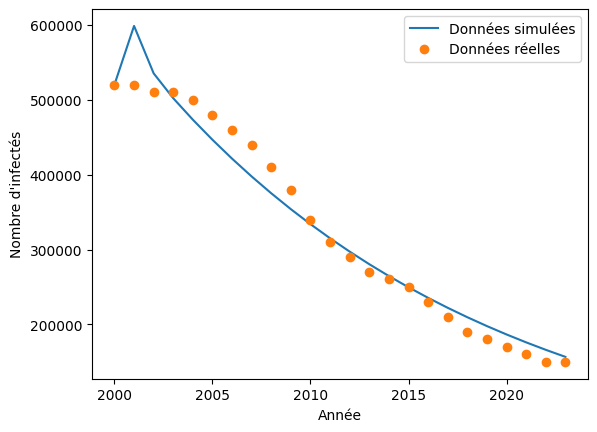

In [60]:
# Visualisation des résultats
import matplotlib.pyplot as plt
plt.plot(years, simulated_results[:, 0], label='Données simulées')
plt.plot(years, infection_data, 'o', label='Données réelles')
plt.xlabel('Année')
plt.ylabel('Nombre d\'infectés')
plt.legend()
plt.show()

In [61]:
lamda


1.4611950064189527

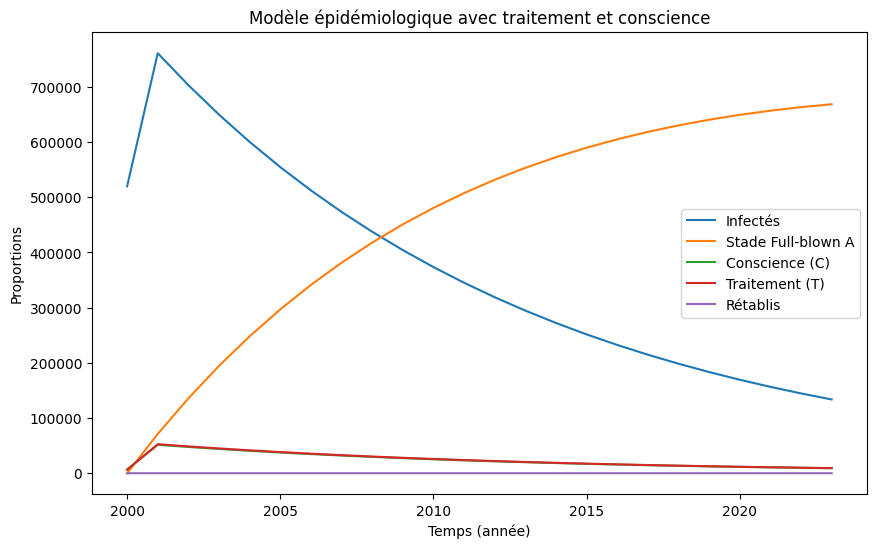

In [57]:
# Temps (jours)

t = np.arange(0,24)
#t = np.arange(0, 8760, 0.05)

# Résoudre les ODEs
solution = odeint(hiv_model, initial_conditions, t, args=(beta, alpha1, alpha2, mu, k1, k2, d, lamda, delta1, delta2, sigma))
i, a, c, t_val, s, r  = solution.T
"""total_days = 24 * 365
dt = 0.05  # One time step corresponds to 0.05 days

# Generate time array from 0 (corresponding to the year 2000) to 2023
t_days = np.arange(0, total_days, dt)  # Time in days
t_years = 2000 + t_days / 365  # Convert time to years
step=24/50"""
t=t+2000
# Visualiser les résultats
plt.figure(figsize=(10,6))
#plt.plot(t, s, label="Susceptibles")
plt.plot(t, i, label="Infectés")
plt.plot(t, a, label="Stade Full-blown A")
plt.plot(t, c, label="Conscience (C)")
plt.plot(t, t_val, label="Traitement (T)")
plt.plot(t, r, label="Rétablis")
plt.xlabel("Temps (année)")
plt.ylabel("Proportions")
plt.legend()
plt.title("Modèle épidémiologique avec traitement et conscience")
plt.show()

Text(0.5, 1.0, 'Progression de ceofficent de traitement en fct de lambda')

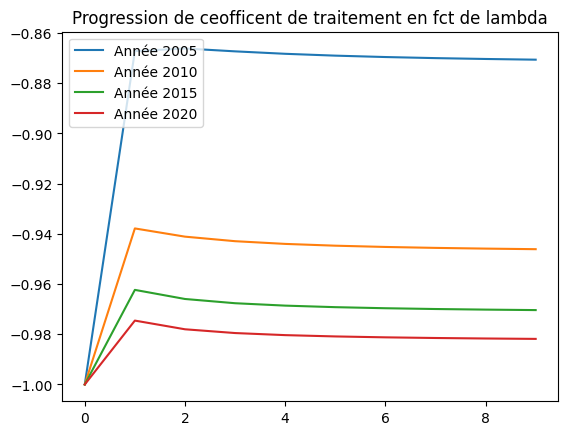

In [93]:
treated=[]
non_treated=[]
L=np.zeros((10,4))
legends=[]
#for i in range(5,24,5):
    #legends.append(f"year{i}")
lamda_range=np.arange(0,10,1)
for i in lamda_range:
    solution = odeint(hiv_model, initial_conditions, t, args=(beta, alpha1, alpha2, mu, k1, k2, d, i, delta1, delta2, sigma))
    for j in range(5,24,5):
        L[i,int(j/5)-1]=((solution.T[3][j]-solution.T[1][j])/solution.T[1][j])
for i in range(4):
    h=[5,10,15,20]
    plt.plot(lamda_range, L[:, i], label=f'Année {h[i]+2000}')
plt.legend()
plt.title('Progression de ceofficent de traitement en fct de lambda')

Text(0.5, 1.0, 'Progression de ceofficent de traitement en fct de k2')

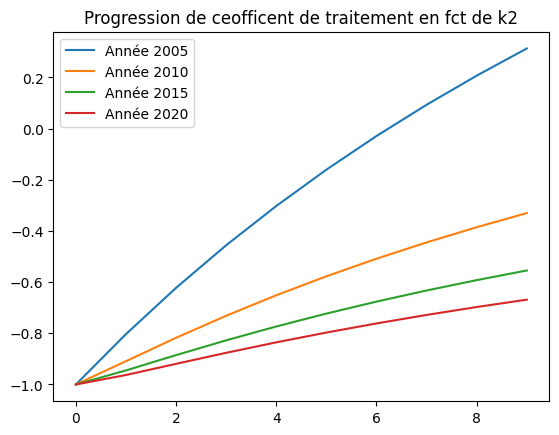

In [95]:
L=np.zeros((10,4))
legends=[]
#for i in range(5,24,5):
    #legends.append(f"year{i}")
k2_range=np.arange(0,10,1)
for i in k2_range:
    solution = odeint(hiv_model, initial_conditions, t, args=(beta, alpha1, alpha2, mu, k1, i, d, lamda, delta1, delta2, sigma))
    for j in range(5,24,5):
        L[i,int(j/5)-1]=((solution.T[3][j]-solution.T[1][j])/solution.T[1][j])
for i in range(4):
    h=[5,10,15,20]
    plt.plot(lamda_range, L[:, i], label=f'Année {h[i]+2000}')
plt.legend()
plt.title('Progression de coefficient de traitement en fct de k2')

In [94]:
k2

0.671174536583752

### 2.4 Évaluation des paramètres

In [ ]:
R0=beta/(d+k1+k2)

In [ ]:
k1,k2

(0.08636947981506037, 0.671174536583752)

In [ ]:
R0

0.662230528821017

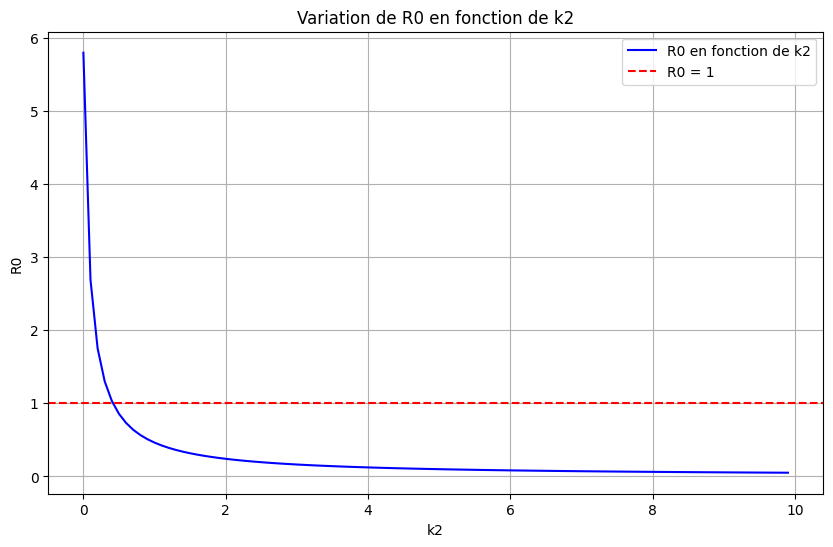

In [ ]:
i=np.arange(0,10,0.1)
R0=beta/(d+k1+i)
plt.figure(figsize=(10, 6))
plt.plot(i, R0, label='R0 en fonction de k2', color='b')
plt.xlabel('k2')
plt.ylabel('R0')
plt.title('Variation de R0 en fonction de k2')
plt.axhline(1, color='r', linestyle='--', label='R0 = 1')
plt.legend()
plt.grid()
plt.show()